# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

### Иванов Александр Владимирович, ФУПМ, группа 573б (avi2011class@yandex.ru)

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

# Ваш код здесь
A = np.random.randint(0, 100, (10, 10))
A

array([[57, 64, 26, 61, 17,  9, 50, 92, 77, 80],
       [55, 62, 14, 39, 24, 57, 80, 33, 89, 52],
       [58, 27, 62, 92, 57, 90, 36,  7, 61, 82],
       [38, 60, 23, 55,  2, 91, 22, 50, 70, 19],
       [95, 68, 11,  5, 62, 48,  2, 45, 28, 59],
       [42, 54,  3, 83, 38, 30, 22, 52, 56,  9],
       [48, 84, 48, 39, 84, 36, 26, 65, 28, 41],
       [33, 85, 49, 31, 61, 86,  5, 89, 24, 24],
       [94,  8, 10, 56, 64, 60, 13, 26, 39, 18],
       [56,  1, 26, 74, 54, 51, 76, 64, 94, 86]])

In [3]:
# Посчитайте средние значения в матрице по столбцам
A.mean(axis=0)
# Ваш код здесь

array([52.6, 48.9, 62.9, 68.6, 48.4, 48.9, 42.4, 52.5, 46.5, 37.3])

In [4]:
# Транспонируйте матрицу A
A.T
# Ваш код здесь

array([[56, 85,  9, 87, 41, 37, 89, 21, 95,  6],
       [72, 27, 11, 83, 59, 29, 89, 28, 52, 39],
       [73, 76, 83, 55, 72, 16, 79, 69, 86, 20],
       [46, 46, 72, 68, 82, 85, 78, 50, 89, 70],
       [50, 75, 35,  1, 70, 34, 76, 88, 35, 20],
       [ 7, 56, 34, 50, 24, 81,  3, 97, 46, 91],
       [74, 23, 55, 78, 20, 36,  5, 40, 90,  3],
       [ 3, 99, 67, 40, 94, 73, 11, 20, 37, 81],
       [42, 70,  6, 31, 43, 49,  5, 98, 54, 67],
       [62,  1, 52,  9, 52, 16,  3, 31, 55, 92]])

In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 
A * A.T
# Ваш код здесь

array([[3136, 6120,  657, 4002, 2050,  259, 6586,   63, 3990,  372],
       [6120,  729,  836, 3818, 4425, 1624, 2047, 2772, 3640,   39],
       [ 657,  836, 6889, 3960, 2520,  544, 4345, 4623,  516, 1040],
       [4002, 3818, 3960, 4624,   82, 4250, 6084, 2000, 2759,  630],
       [2050, 4425, 2520,   82, 4900,  816, 1520, 8272, 1505, 1040],
       [ 259, 1624,  544, 4250,  816, 6561,  108, 7081, 2254, 1456],
       [6586, 2047, 4345, 6084, 1520,  108,   25,  440,  450,    9],
       [  63, 2772, 4623, 2000, 8272, 7081,  440,  400, 3626, 2511],
       [3990, 3640,  516, 2759, 1505, 2254,  450, 3626, 2916, 3685],
       [ 372,   39, 1040,  630, 1040, 1456,    9, 2511, 3685, 8464]])

In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product
np.matrix(A) * np.matrix(A).T
# Ваш код здесь

matrix([[29407, 23511, 20402, 26143, 26032, 17438, 25367, 24666, 33957,
         18444],
        [23511, 39838, 23581, 27752, 33744, 27641, 26985, 31908, 34878,
         25769],
        [20402, 23581, 24910, 20516, 26524, 20041, 17913, 21942, 28375,
         21755],
        [26143, 27752, 20516, 33334, 26391, 23761, 26017, 23521, 36367,
         20568],
        [26032, 33744, 26524, 26391, 36335, 26195, 27881, 28575, 34467,
         28650],
        [17438, 27641, 20041, 23761, 26195, 26690, 17871, 25990, 28347,
         26450],
        [25367, 26985, 17913, 26017, 27881, 17871, 34132, 21694, 30909,
         14355],
        [24666, 31908, 21942, 23521, 28575, 25990, 21694, 38204, 32714,
         27843],
        [33957, 34878, 28375, 36367, 34467, 28347, 30909, 32714, 45797,
         27379],
        [18444, 25769, 21755, 20568, 28650, 26450, 14355, 27843, 27379,
         35061]])

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [2]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [4]:
import sklearn.model_selection
all_data, delayed_data = sklearn.model_selection.train_test_split(all_data, test_size=0.2)
# Ваш код здесь

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [5]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [7]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [8]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
    sklearn.model_selection.train_test_split(two_class_feature_matrix, two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [11]:
import sklearn.metrics
import sklearn.linear_model

lr_clf = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(train_feature_matrix, train_labels)

lr_clf_predicted = lr_clf.predict(test_feature_matrix)
accuracy_score = sklearn.metrics.accuracy_score(lr_clf_predicted, test_labels)
f1_score = sklearn.metrics.f1_score(lr_clf_predicted, test_labels)

print("Logistic regression: accuracy={:06f} f1_score={:06f}".format(accuracy_score, f1_score))

lr_clf = sklearn.linear_model.LogisticRegressionCV(solver='lbfgs', max_iter=1000)
lr_clf.fit(train_feature_matrix, train_labels)

lr_clf_predicted = lr_clf.predict(test_feature_matrix)
accuracy_score = sklearn.metrics.accuracy_score(lr_clf_predicted, test_labels)
f1_score = sklearn.metrics.f1_score(lr_clf_predicted, test_labels)

print("Logistic regression with CV select C: accuracy={:06f} f1_score={:06f}".format(accuracy_score, f1_score))
# Ваш код здесь

Logistic regression: accuracy=0.779206 f1_score=0.741096
Logistic regression with CV select C: accuracy=0.770444 f1_score=0.730268


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [14]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = \
    sklearn.model_selection.train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

lr_clf = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=100, multi_class='multinomial', n_jobs=7)
lr_clf.fit(train_feature_matrix, train_labels)

lr_clf_predicted = lr_clf.predict(test_feature_matrix)
accuracy_score = sklearn.metrics.accuracy_score(lr_clf_predicted, test_labels)

print("Logistic regression: accuracy={:06f}".format(accuracy_score))

lr_clf = sklearn.linear_model.LogisticRegressionCV(solver='lbfgs', max_iter=100, multi_class='multinomial', n_jobs=7)
lr_clf.fit(train_feature_matrix, train_labels)

lr_clf_predicted = lr_clf.predict(test_feature_matrix)
accuracy_score = sklearn.metrics.accuracy_score(lr_clf_predicted, test_labels)

print("Logistic regression with CV select: accuracy={:06f}".format(accuracy_score))
# Ваш код здесь

Logistic regression: accuracy=0.643750
Logistic regression with CV select: accuracy=0.684375


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [15]:
estimator = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga')
result_CV = sklearn.model_selection.GridSearchCV(estimator, 
                                    param_grid={'C' : np.linspace(0.01, 1, 10), 'penalty' : ['l1', 'l2']},
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    cv=5)
result_CV.fit(train_feature_matrix, train_labels)
result_CV.best_params_

{'C': 0.12, 'penalty': 'l1'}

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [14]:
N = 5
list (enumerate(np.linspace(0.01, 1, N)))


[(0, 0.01), (1, 0.2575), (2, 0.505), (3, 0.7525), (4, 1.0)]

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import tqdm

N = 5

result = np.zeros((N, 2))

kfold = sklearn.model_selection.KFold(5, shuffle=True)

for C_pair, penalty_pair in tqdm.tqdm(itertools.product(enumerate(np.linspace(0.01, 1, N)), enumerate(['l1', 'l2'])), total=N*2):
     result[C_pair[0]][penalty_pair[0]] = sklearn.model_selection.cross_val_score(
         sklearn.linear_model.LogisticRegression(solver='saga', multi_class='multinomial', penalty=penalty_pair[1], C=C_pair[1]),
         train_feature_matrix,
         train_labels,
         scoring='accuracy',
         cv=kfold,
         n_jobs=-1
     ).mean()
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.13it/s]


In [18]:
result

array([[0.72035054, 0.72035054],
       [0.72190847, 0.72190847],
       [0.7211295 , 0.7211295 ],
       [0.72268744, 0.72268744],
       [0.72346641, 0.72346641]])

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

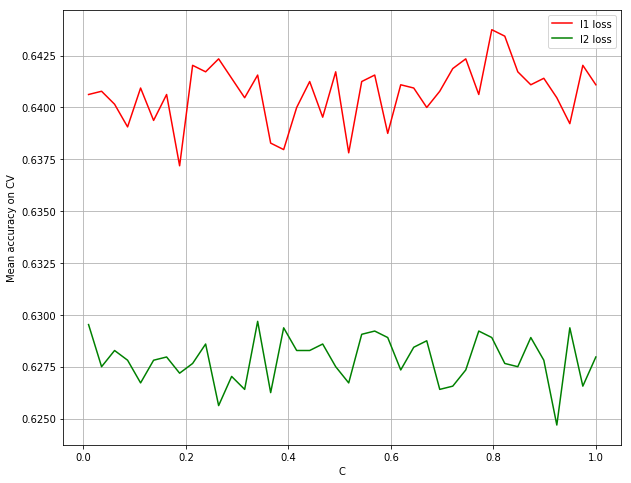

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.grid()

ax.plot(np.linspace(0.01, 1, N), result[:, 0], label='l1 loss', c='red')
ax.plot(np.linspace(0.01, 1, N), result[:, 1], label='l2 loss', c='green')

ax.set_xlabel('C')
ax.set_ylabel('Mean accuracy on CV')

ax.legend()

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [18]:
best_lr_clf = LogisticRegression(solver='saga', multi_class='multinomial', **result_CV.best_params_, max_iter=1000)
best_lr_clf.fit(train_feature_matrix, train_labels)
predicted = best_lr_clf.predict_proba(test_feature_matrix)
# Ваш код здесь

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [19]:
print('predicted_proba_mean:\n', predicted.mean(axis=0))

tmp = np.array([(train_labels == (i + 1)).sum() for i in range(7)])
print('real_proba_mean: \n', tmp / len(train_labels))

# числа близки

predicted_proba_mean:
 [0.36518451 0.48876381 0.06070765 0.00468927 0.01689912 0.02916778
 0.03458787]
real_proba_mean: 
 [0.37203125 0.4859375  0.05921875 0.00484375 0.0165625  0.0296875
 0.03171875]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.pipeline

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [21]:
N = 15

result = np.zeros((N, 2))

kfold = sklearn.model_selection.KFold(5, shuffle=True)

for N_pair, W_pair in tqdm.tqdm(itertools.product(enumerate(range(1, N)), enumerate(['uniform', 'distance'])), total=N*2-2):
     result[N_pair[0]][W_pair[0]] = sklearn.model_selection.cross_val_score(
         sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), 
                                        sklearn.neighbors.KNeighborsClassifier(n_neighbors=N_pair[1], weights=W_pair[1])),
         train_feature_matrix,
         train_labels,
         scoring='accuracy',
         cv=kfold,
         n_jobs=-1
     ).mean()

100%|██████████| 28/28 [00:28<00:00,  1.01s/it]


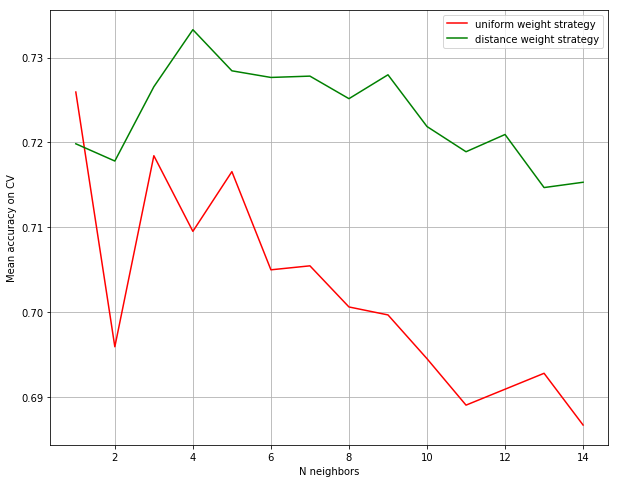

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.grid()

ax.plot(range(1, N), result[:-1, 0], label='uniform weight strategy', c='red')
ax.plot(range(1, N), result[:-1, 1], label='distance weight strategy', c='green')

ax.set_xlabel('N neighbors')
ax.set_ylabel('Mean accuracy on CV')

ax.legend()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [23]:
best = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7, weights='uniform')
best.fit(train_feature_matrix, train_labels)
predicted = best.predict_proba(test_feature_matrix)

print('predicted_proba_mean:\n', predicted.mean(axis=0))

tmp = np.array([(train_labels == (i + 1)).sum() for i in range(7)])
print('real_proba_mean: \n', tmp / len(train_labels))

# числа близки

predicted_proba_mean:
 [0.37071429 0.49357143 0.06366071 0.00535714 0.01794643 0.02375
 0.025     ]
real_proba_mean: 
 [0.37203125 0.4859375  0.05921875 0.00484375 0.0165625  0.0296875
 0.03171875]


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [25]:
best_knn = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(),sklearn.neighbors.KNeighborsClassifier(n_neighbors=7, weights='uniform'))
best_knn.fit(train_feature_matrix, train_labels)
predicted_knn = best_knn.predict(delayed_data[delayed_data.columns[:-1]])
res_knn = sklearn.metrics.accuracy_score(predicted_knn, delayed_data[delayed_data.columns[-1]])
print('KNN:', res_knn)

best_lin = sklearn.linear_model.LogisticRegression(solver='saga', multi_class='multinomial', C=0.56, penalty='l1')
best_lin.fit(train_feature_matrix, train_labels)
predicted_lin = best_lin.predict(delayed_data[delayed_data.columns[:-1]])
res_lin = sklearn.metrics.accuracy_score(predicted_lin, delayed_data[delayed_data.columns[-1]])
print('LOGIT:', res_lin)
# KNN лучше

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


KNN: 0.7055
LOGIT: 0.638


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
